<a href="https://colab.research.google.com/github/luiska147/allure-store-challenge/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [11]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [12]:
tienda4.shape

(2358, 12)

#1. Análisis de facturación



In [13]:
todas_las_tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4}

def sumar_ingreso_total(tiendas):
  ingreso_total = tiendas["Precio"].sum()
  return ingreso_total

for nombre, datos in todas_las_tiendas.items():
  resultado_total = sumar_ingreso_total(datos)
  print(f"El ingreso total de la {nombre} es de: {resultado_total}")


El ingreso total de la Tienda 1 es de: 1150880400.0
El ingreso total de la Tienda 2 es de: 1116343500.0
El ingreso total de la Tienda 3 es de: 1098019600.0
El ingreso total de la Tienda 4 es de: 1038375700.0


In [14]:
tienda["Precio"].isna()

,Precio
0,False
1,False
2,False
3,False
4,False
...,...
2354,False
2355,False
2356,False
2357,False


# 2. Ventas por categoría

In [15]:
def agrupar_por_columna(tiendas):
  for nombre, tienda in tiendas.items():
    print(f"Categorias mas populares en {nombre}")
    categoria = tienda.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending = False)
    print(categoria)
agrupar_por_columna(todas_las_tiendas)

Categorias mas populares en Tienda 1
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: Producto, dtype: int64
Categorias mas populares en Tienda 2
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: Producto, dtype: int64
Categorias mas populares en Tienda 3
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
Name: Producto, dt

# 3. Calificación promedio de la tienda


In [16]:
def calificacion_promedio_tiendas(tiendas):
  for nombre, tienda in tiendas.items():
    calificacion = tienda["Calificación"].mean()
    print(f"La valoración media de la {nombre} es de {calificacion:.2f}")


calificacion_promedio_tiendas(todas_las_tiendas)

La valoración media de la Tienda 1 es de 3.98
La valoración media de la Tienda 2 es de 4.04
La valoración media de la Tienda 3 es de 4.05
La valoración media de la Tienda 4 es de 4.00


# 4. Productos más y menos vendidos

Grafico de productos mas vendidos en Tienda 1


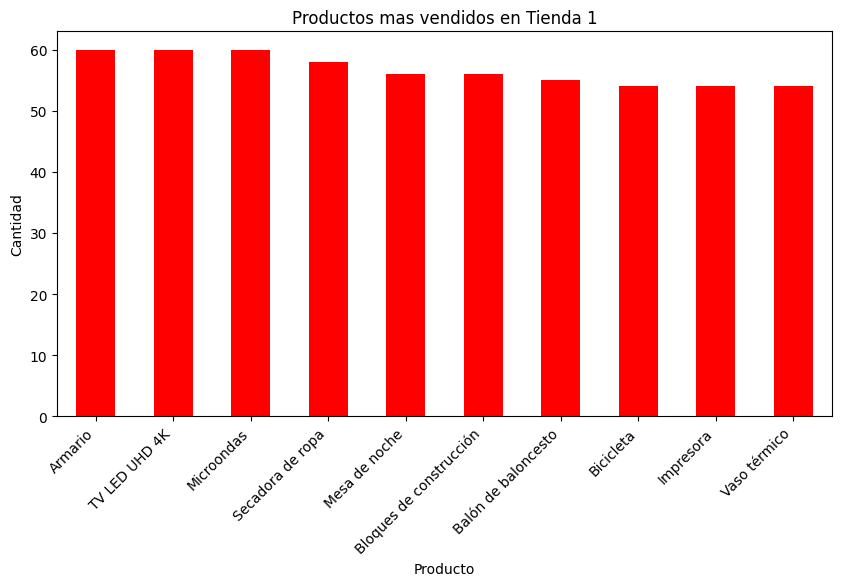

Grafico de productos menos vendidos en Tienda 1


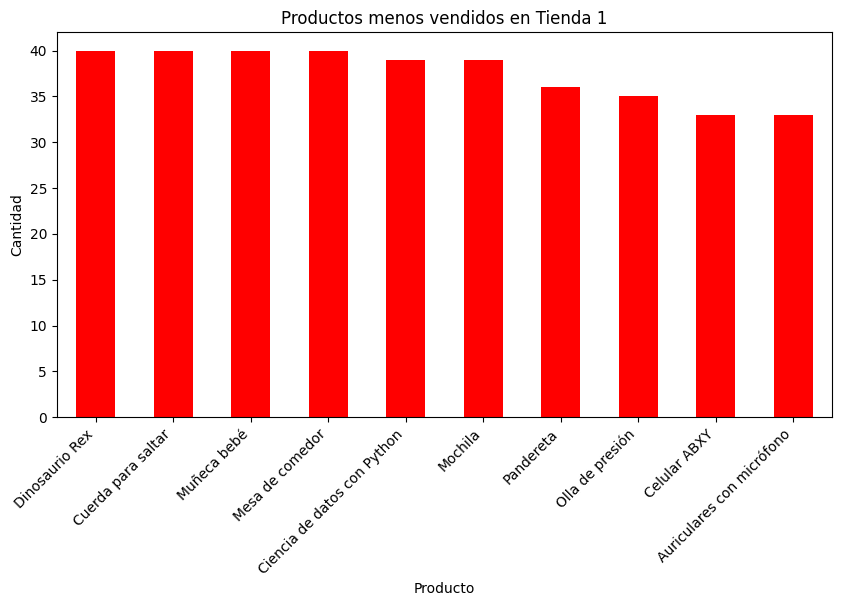

Grafico de productos mas vendidos en Tienda 2


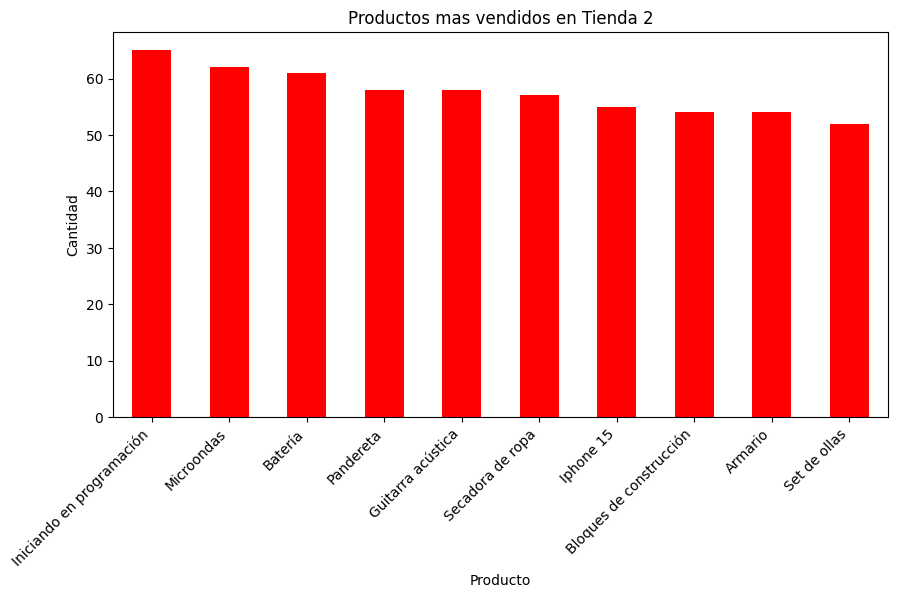

Grafico de productos menos vendidos en Tienda 2


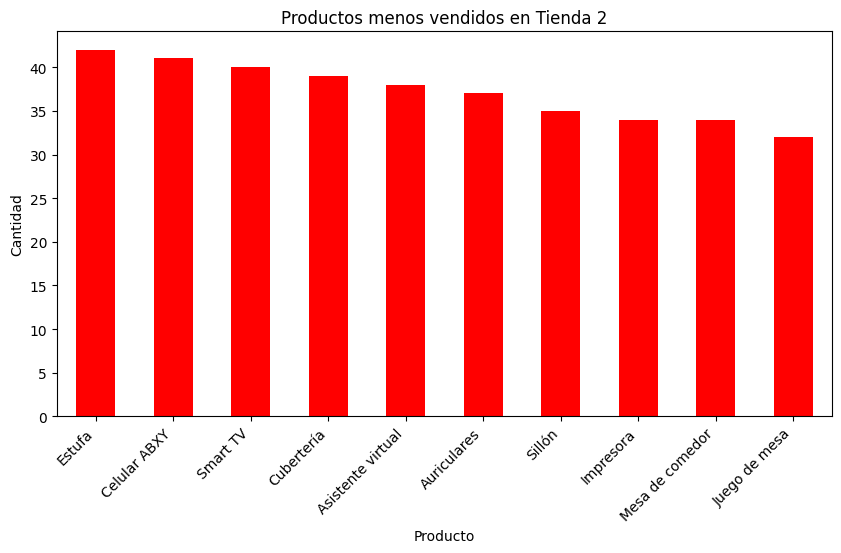

Grafico de productos mas vendidos en Tienda 3


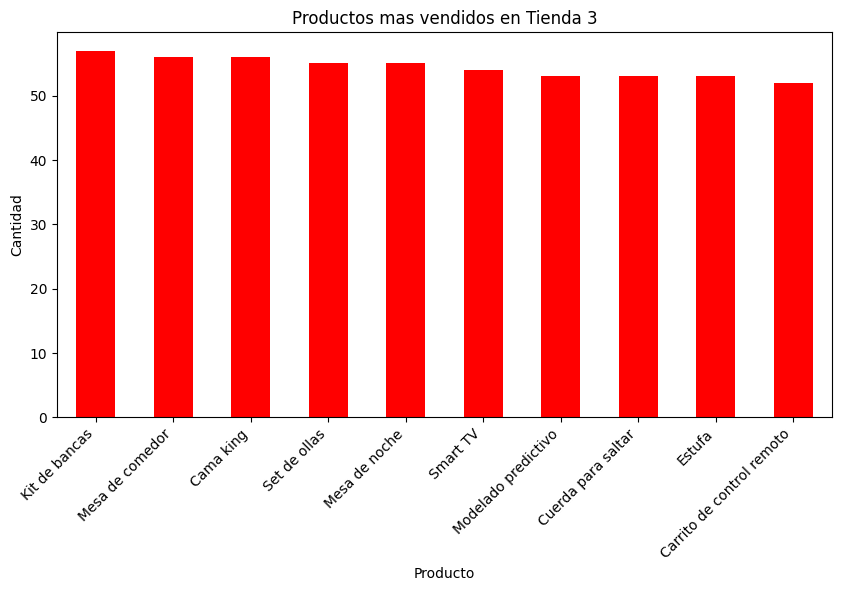

Grafico de productos menos vendidos en Tienda 3


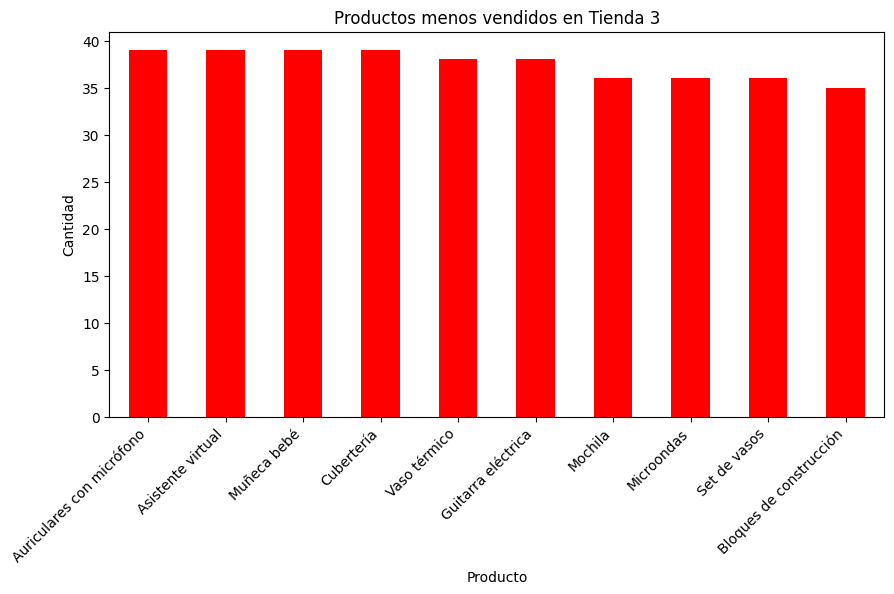

Grafico de productos mas vendidos en Tienda 4


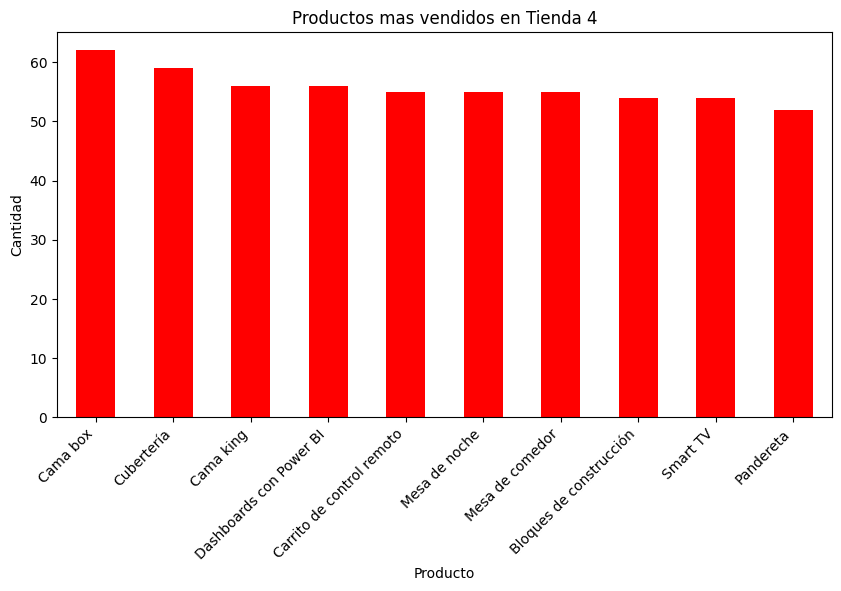

Grafico de productos menos vendidos en Tienda 4


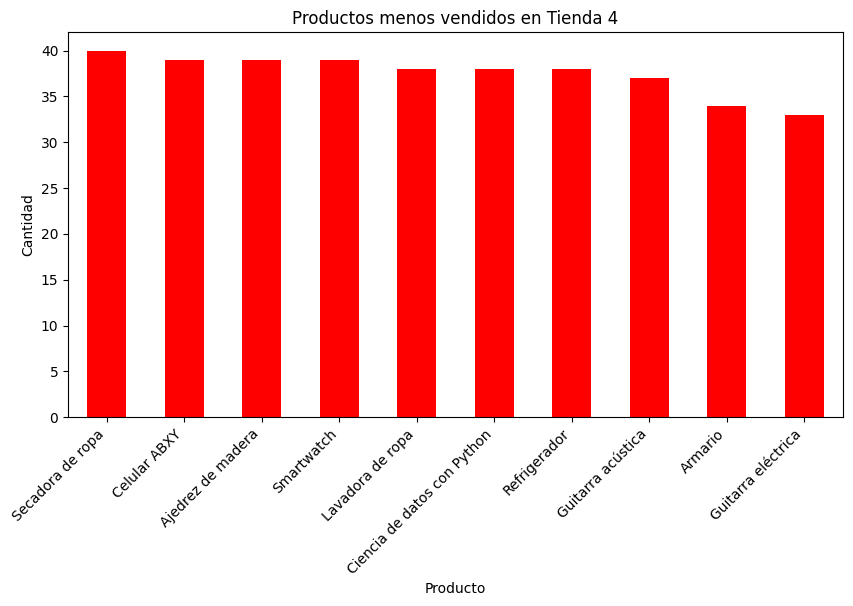

In [17]:
from numpy._core.defchararray import title
import matplotlib.pyplot as plt

def productos_mas_menos_vendidos(tiendas):
  for nombre, tienda in tiendas.items():
    ventas_productos = tienda.groupby("Producto")["Producto"].count().sort_values(ascending = False)
    mas_vendidos = ventas_productos.head(10)
    menos_vendidos = ventas_productos.tail(10)
    print(f"Grafico de productos mas vendidos en {nombre}")
    mas_vendidos.plot(kind="bar", figsize=(10,5), color="red", title= f"Productos mas vendidos en {nombre}", ylabel="Cantidad")
    plt.xticks(rotation= 45, ha = "right")
    plt.show()
    print(f"Grafico de productos menos vendidos en {nombre}")
    menos_vendidos.plot(kind="bar", figsize=(10,5), color="red", title= f"Productos menos vendidos en {nombre}", ylabel="Cantidad")
    plt.xticks(rotation= 45, ha = "right")
    plt.show()
productos_mas_menos_vendidos(todas_las_tiendas)

# 5. Envío promedio por tienda

In [18]:
def costo_promedio_envio(tiendas):
  for nombre, tienda in tiendas.items():
    promedio_envio = tienda["Costo de envío"].mean()
    print(f"El costo promedio de envío de la {nombre} es de {promedio_envio:.2f}")

costo_promedio_envio(todas_las_tiendas)

El costo promedio de envío de la Tienda 1 es de 26018.61
El costo promedio de envío de la Tienda 2 es de 25216.24
El costo promedio de envío de la Tienda 3 es de 24805.68
El costo promedio de envío de la Tienda 4 es de 23459.46


# Analisis de facturacion de las tiendas


El ingreso total de la Tienda 1 es de: 1150880400.0
El ingreso total de la Tienda 2 es de: 1116343500.0
El ingreso total de la Tienda 3 es de: 1098019600.0
El ingreso total de la Tienda 4 es de: 1038375700.0


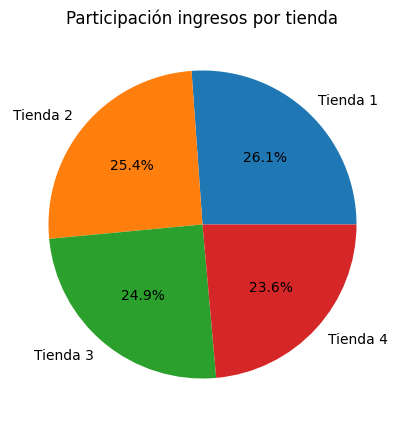

In [19]:
ingreso_por_tienda = {}
for nombre, datos in todas_las_tiendas.items():
  resultado_total = sumar_ingreso_total(datos)
  ingreso_por_tienda[nombre] = resultado_total
  print(f"El ingreso total de la {nombre} es de: {resultado_total}")
plt.figure(figsize=(5,5))
plt.pie(ingreso_por_tienda.values(), labels=ingreso_por_tienda.keys(), autopct='%1.1f%%')
plt.title("Participación ingresos por tienda")
plt.show()

# calificacion promedio en las tiendas

La valoración media de la Tienda 1 es de 3.98
La valoración media de la Tienda 2 es de 4.04
La valoración media de la Tienda 3 es de 4.05
La valoración media de la Tienda 4 es de 4.00


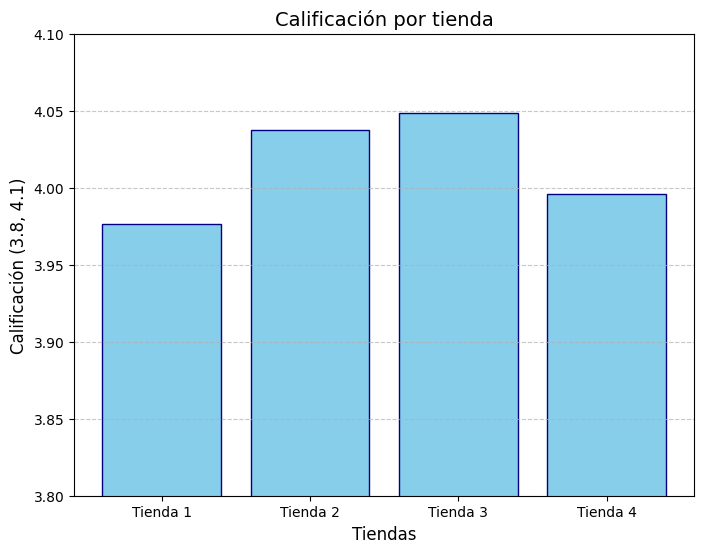

In [20]:
calificacion = {}
def calificacion_promedio_tiendas(tiendas):
  for nombre, tienda in tiendas.items():
    promedio = tienda["Calificación"].mean()
    calificacion[nombre] = promedio
    print(f"La valoración media de la {nombre} es de {promedio:.2f}")


calificacion_promedio_tiendas(todas_las_tiendas)
plt.figure(figsize=(8,6))
plt.bar(calificacion.keys(), height=calificacion.values(), color="skyblue", edgecolor="navy")
plt.title("Calificación por tienda", fontsize=14)
plt.xlabel("Tiendas", fontsize= 12)
plt.ylabel("Calificación (3.8, 4.1)", fontsize= 12)
plt.ylim(3.8, 4.1)
plt.grid(axis="y", linestyle="--", alpha= 0.7)
plt.show()

#**Informe final**

Este informe analizara el comportamiento de cada tienda y evidenciará, según la investigación realizada, teniendo en cuenta los ingresos totales de las tiendas, las categorias de productos mas vendidas y menos vendidas, las calificaciones promedio de los clientes para cada tienda, sus productos mas y menos vendidos y el coste de envío promedio podemos observar los siguientes comportamientos:

* La tienda con mayor ingreso es la tienda 1 con $ 1,150,880,400

* La que menor ingreso tuvo fue la tienda 4 con $ 1,038,375,700

* En todas las tiendas, la categoria mas vendida es Muebles, y la menos vendida esta entre articulos de hogar (Tienda 1 y 2) e instrumentos musicales (Tienda 3 y 4)

* La Tienda con menor calificación en la Tienda 1 con 3.98% seguida por la Tienda 4 con 4%

* Se obtienen los productos mas y menos vendidos los cuales nos brindan información clara, pero no son relevantes para este analisis.

* La tienda con mayor costo de envío (el cual es asumido por el cliente) es la Tienda 1 con un promedio por envío de $26,018.61.

* La tienda con menor costo de envío es la Tienda 4 con un promedio por envío de $23,459.46.

Tienendo en cuenta estos factores, se podría asumir que aunque la Tienda 1 tiene un costo de envío mas alto y esto genera una baja en las calificaciones de los clientes, la Tienda 4 es la que se debería vender, ya que sus ventas son las menores de todas las tiendas, y aunque no tenga la peor calificación, se podrían generar programas de incentivos en atencion al cliente para la Tienda 1, y asumir partes del costo de envío para poder subir su calificación. Por tanto se reitera en la sugerencia de la venta de la Tienda 4, para enfocar los esfuerzos de la compañia en las tres tiendas restantes, y por ende, disminuir los costes de logistica, y aumentar la operación de las tiendas restantes aprovechando su buen posicionamiento y nivel de ingresos.


